<div>
Olá, Jonathas!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>
    
Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto está muito bom e possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
- Uso adequado de gráficos e visualizações
    
<br> 
    
Entretanto, deixei alguns comentários em pequenos ajustes que precisamos fazer antes de avançarmos. Peço que trabalhe nesses pontos para seguirmos.
 
<br>
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**

</div>

# Análise de Dados de Videogames

In [148]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
df = pd.read_csv('data/games.csv')

In [149]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Padronizar os nomes das colunas para minúsculas e substituir espaços por underscores.

In [150]:
new_col_names = [old_name.strip().lower().replace(' ', '_') for old_name in df.columns]
df.columns = new_col_names
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Descrição das colunas
—Name (nome)

—Platform (plataforma)

—Year_of_Release (Ano de lançamento)

—Genre (gênero)

—NA_sales (vendas norte-americanas em milhões de USD)

—EU_sales (vendas na Europa em milhões de USD)

—JP_sales (vendas no Japão em milhões de USD)

—Other_sales (vendas em outros países em em milhões de USD)

—Critic_Score (Pontuação crítica) (máximo de 100)

—User_Score (Pontuação do usuário) (máximo de 10)

—Classificação (ESRB)

### Problemas
colunas que tem que mudar o tipo: year_of_release , critic_score , user_score

In [151]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [152]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [153]:
# Convertendo 'year_of_release' para inteiro com suporte a valores ausentes (pd.Int64Dtype)
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Convertendo 'critic_score' para inteiro com suporte a valores ausentes (pd.Int64Dtype)
df['critic_score'] = df['critic_score'].astype('Int64')

# Convertendo 'user_score' para numérico, tratando erros e convertendo 'tbd' para NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Exibindo informações sobre os tipos de dados após as conversões
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


In [154]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5380,Trauma Center: Second Opinion,Wii,2006,Simulation,0.28,0.01,0.03,0.03,80,8.0,T
16099,Sengoku Hime: Senran ni Mau Otometachi,PSP,2009,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
1688,Nuclear Strike,PS,1997,Simulation,0.66,0.45,0.00,0.08,<NA>,NaN,NaN
5398,Leisure Suit Larry: Magna Cum Laude,PS2,2004,Adventure,0.17,0.13,0.00,0.04,60,6.3,M
7013,Sherlock Holmes and the Mystery of Osborne House,DS,2010,Adventure,0.07,0.14,0.00,0.03,48,NaN,E10+
11489,My Friends,DS,2009,Misc,0.07,0.00,0.00,0.01,<NA>,NaN,E
10238,Invizimals: The Lost Tribes,PSP,2011,Action,0.00,0.08,0.00,0.03,<NA>,NaN,NaN
14563,Charlie Blasts Territory,N64,1999,Action,0.02,0.01,0.00,0.00,<NA>,NaN,NaN
14671,Royal Palace of White Sword and The City of Ge...,PC,2009,Role-Playing,0.00,0.02,0.00,0.00,<NA>,NaN,NaN
4933,Ice Age 2: The Meltdown,PS2,2006,Platform,0.19,0.15,0.00,0.05,68,8.0,E10+


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram carregados corretamente em célula separada
- O método `head()` foi utilizado para exibir uma amostra dos dados
- O método `info()` foi utilizado para estudo inicial dos dados
- O nome das colunas foi renomeado para seguir a convenção `snake_case`
</div>

### Explicação das alterações de tipo de dados:

- **year_of_release**:  
    Foi convertido para o tipo inteiro com suporte a valores ausentes (`pd.Int64Dtype`), preservando os valores `NaN` sem atribuir um valor arbitrário, como `0`. Dessa forma, evitamos distorcer a distribuição dos dados e mantemos a integridade da informação.
    
- **critic_score**:  
    Também foi convertido para um inteiro com suporte a valores ausentes, permitindo que os valores `NaN` sejam mantidos, sem substituí-los por `0` — valor que poderia ser interpretado erroneamente como uma nota válida.
    
- **user_score**:  
    Convertido para o tipo numérico (`float64`) usando `pd.to_numeric` com `errors='coerce'`. Essa abordagem converte valores não numéricos (por exemplo, `'tbd'`) em `NaN`, garantindo que as análises estatísticas ignorem corretamente os valores ausentes.

### Possíveis razões para valores ausentes:

- Dados Históricos e Coleta Incompleta: Para jogos mais antigos, especialmente com year_of_release faltante, é possível que os registros de lançamento originais não fossem sistemáticos ou que a coleta de dados retrospectiva seja incompleta. A ausência de critic_score e user_score pode ser mais comum em jogos menos populares ou de nicho, que podem não ter recebido atenção da crítica ou da base de usuários em massa.

- Erros de Registro e Entrada de Dados: Erros humanos durante a entrada de dados ou problemas técnicos nos sistemas de registro podem levar à falta de informação em algumas entradas.
'TBD' em user_score: A presença de 'tbd' (To Be Determined) indica que, no momento da coleta dos dados, a pontuação do usuário ainda não estava disponível, comum para jogos recém-lançados ou menos populares.

- Não Aplicável: Em alguns casos, a métrica pode simplesmente não ser aplicável. Jogos obscuros podem nunca ter sido avaliados por críticos, resultando em critic_score ausente.

### Tratamento de 'TBD':
- A abreviação 'TBD' em user_score foi tratada como um valor ausente, convertendo-se em NaN através de pd.to_numeric(errors='coerce'). Essa abordagem é justificada porque 'TBD' indica que a pontuação do usuário é indeterminada ou não divulgada, o que equivale a um valor ausente para análise quantitativa

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Aqui não é o ideal preencher os valores ausentes do atributo `year_of_release` com `0`, pois essa operação irá distorcer a distribuição dos dados. Como sugestão, você pode analisar a quantidade de valores ausentes e se compensa removê-los ou **deixar os valores ausentes** como estão.
- Essa observação serve para os atributos de score também (`critic_score` e `user_score`). Note que `0.0` é um valor possível de nota e, desta forma, você está assumindo que **todos** os valores ausentes possuem essa nota

</div>

In [155]:
df['total_sales'] = (df['na_sales'] + df['eu_sales'] + df['other_sales']).round(2)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,78.77
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,33.43
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,31.73
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,29.49
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,21.16
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.00
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.00
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A coluna `total_sales` foi criada corretamente para agregar a receita!

</div>

In [156]:
print(f'Tamanho do DataFrame ANTES remover jogos com ano ou vendas ausentes: {df.shape}')
# Removendo jogos com ano de lançamento igual a 0 (indicando ano desconhecido ou ausente)
df = df[df['year_of_release'] != 0]

# Removendo jogos com vendas totais iguais a 0 (indicando que não tiveram vendas registradas nas regiões consideradas)
df = df[df['total_sales'] > 0]

# Exibindo o tamanho do DataFrame após a limpeza
print(f'Tamanho do DataFrame APÓS remover jogos com ano ou vendas ausentes: {df.shape}')

Tamanho do DataFrame ANTES remover jogos com ano ou vendas ausentes: (16715, 12)
Tamanho do DataFrame APÓS remover jogos com ano ou vendas ausentes: (13316, 12)


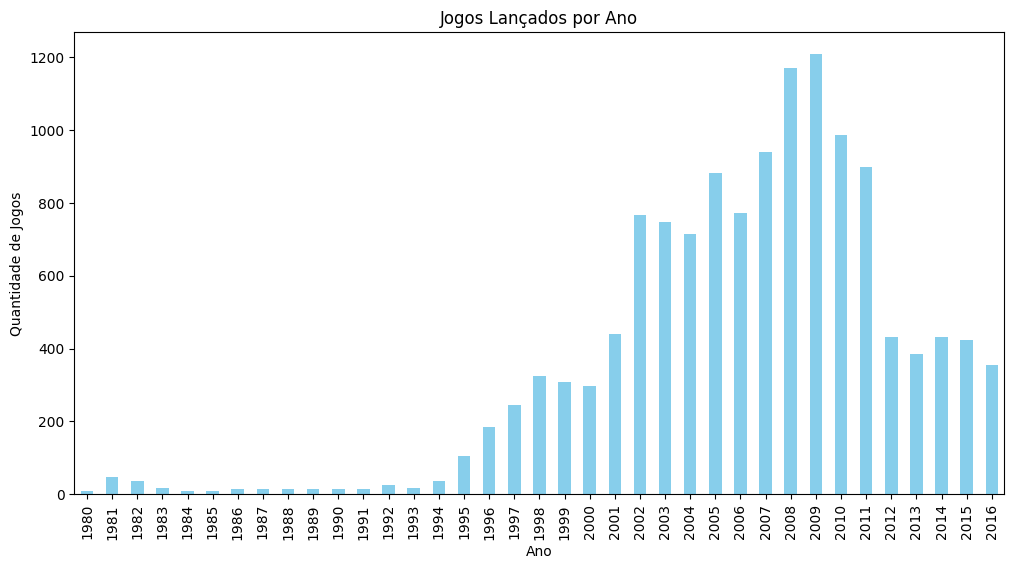

In [157]:
# Contando o número de jogos lançados por ano e ordenando por ano
games_per_year = df['year_of_release'].value_counts().sort_index()

# Plotando um gráfico de barras para visualizar a quantidade de jogos lançados por ano
plt.figure(figsize=(12,6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Jogos Lançados por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Jogos')
plt.show()

### Análise da quantidade de jogos lançados por ano:



O gráfico e os dados revelam um aumento no lançamento de jogos a partir dos anos 90, com um pico em meados dos anos 2000 (2008-2011), seguido por um declínio até 2016.


Significância dos dados por período:

    - Dados Pré-1990: Volume baixo de lançamentos, mercado de videogames menor e menos estabelecido. Dados menos representativos do mercado atual.

    - Dados 1990-2016: Período de expansão da indústria. Dados significativos para entender tendências, ciclo de vida das plataformas e preferências dos consumidores.

    - Declínio Recente (Pós-2011): Pode indicar mudança no mercado, foco em jogos de maior orçamento, aumento de jogos digitais, ou consolidação da indústria. Relevante para projetar tendências para 2017.
Em resumo, dados a partir dos anos 90 são mais relevantes para previsões de mercado, enquanto dados anteriores contextualizam a evolução da indústria

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A distribuição de lançamentos ao longo dos anos foi analisada
- Um gráfico de barras foi utilizado corretamente
</div>

In [158]:
df['platform'].unique()


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD'], dtype=object)

|Código|Nome Completo|Ano de Lançamento|
|---|---|---|
|**Wii**|Nintendo Wii|2006|
|**NES**|Nintendo Entertainment System|1983 (JP), 1985 (EUA)|
|**GB**|Game Boy|1989|
|**DS**|Nintendo DS|2004|
|**X360**|Xbox 360|2005|
|**PS3**|PlayStation 3|2006|
|**PS2**|PlayStation 2|2000|
|**SNES**|Super Nintendo Entertainment System|1990 (JP), 1991 (EUA)|
|**GBA**|Game Boy Advance|2001|
|**PS4**|PlayStation 4|2013|
|**3DS**|Nintendo 3DS|2011|
|**N64**|Nintendo 64|1996|
|**PS**|PlayStation (PS1)|1994|
|**XB**|Xbox|2001|
|**PC**|Personal Computer (PC)|- (Varia conforme hardware)|
|**2600**|Atari 2600|1977|
|**PSP**|PlayStation Portable|2004|
|**XOne**|Xbox One|2013|
|**WiiU**|Nintendo Wii U|2012|
|**GC**|Nintendo GameCube|2001|
|**GEN**|Sega Genesis (Mega Drive)|1988 (JP), 1989 (EUA)|
|**DC**|Sega Dreamcast|1998 (JP), 1999 (EUA)|
|**PSV**|PlayStation Vita|2011|
|**SAT**|Sega Saturn|1994 (JP), 1995 (EUA)|
|**SCD**|Sega CD (Mega-CD)|1991 (JP), 1992 (EUA)|
|**WS**|WonderSwan|1999|
|**NG**|Neo Geo|1990|
|**TG16**|TurboGrafx-16 (PC Engine)|1987 (JP), 1989 (EUA)|
|**3DO**|3DO Interactive Multiplayer|1993|
|**GG**|Sega Game Gear|1990|
|**PCFX**|NEC PC-FX|1994|

In [159]:
contagem_por_plataforma = df['platform'].value_counts()
contagem_por_plataforma.head(10)

platform
PS2     1642
DS      1614
Wii     1198
X360    1173
PS      1156
PS3     1073
PC       957
XB       800
GBA      771
PSP      602
Name: count, dtype: int64

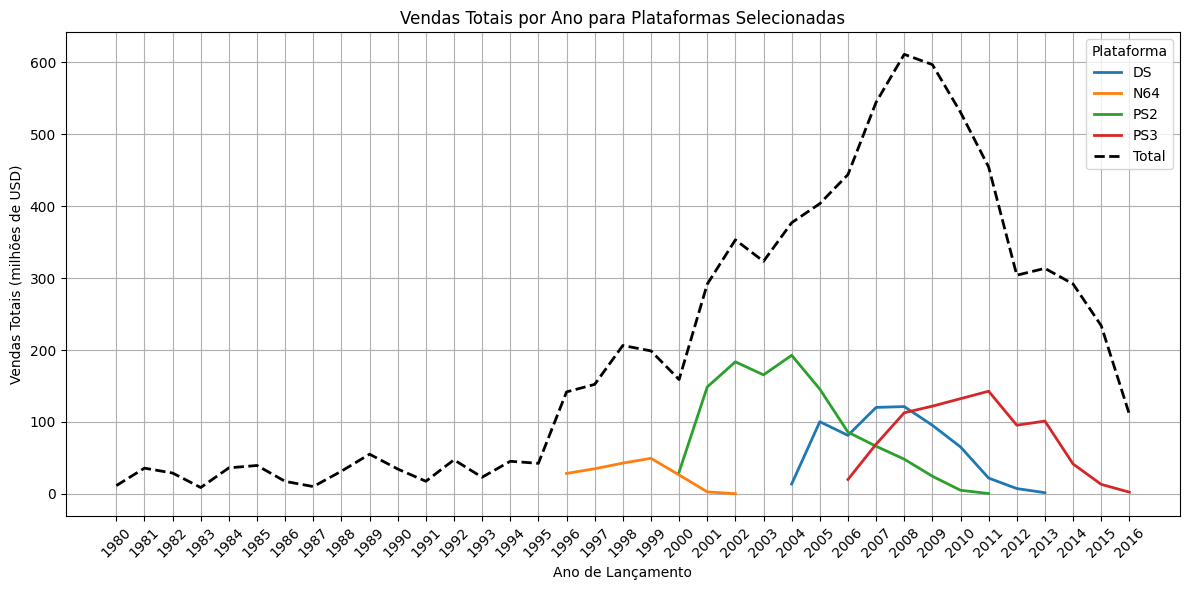

In [160]:
# Plataformas desejadas
platforms = ['PS2', 'DS', 'PS3', 'N64']

# Filtrar e agrupar os dados para as plataformas selecionadas
df_grouped = df[df['platform'].isin(platforms)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Calcular a soma total de vendas por ano (todas as plataformas)
total_por_ano = df.groupby('year_of_release')['total_sales'].sum()  # <--- Nova linha

# Criar o gráfico de linhas
ax = df_grouped.plot(kind='line', figsize=(12, 6), linewidth=2)

# Adicionar a linha do total ao gráfico
total_por_ano.plot(ax=ax, color='black', linewidth=2, linestyle='--', label='Total')  # <--- Nova linha

# Personalizar o gráfico
plt.title("Vendas Totais por Ano para Plataformas Selecionadas")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Vendas Totais (milhões de USD)")
plt.legend(title="Plataforma")
plt.xticks(total_por_ano.index, rotation=45)  # Garante todos os anos no eixo x
plt.tight_layout()
plt.grid()
# Exibir o gráfico
plt.show()

### Analize
No grafico demostro o crescrimento de varias plataformas, onde quando uma decrece outra cresce e ainda mostrando o total do mercado, mostrando que entre 2000 até 2007 ouve um crescimento muito grande. Demora mais ou menos 10 anos para o hipe de uma plataforma ir em bora.

Top 10 plataformas por vendas totais:
 platform
PS2     1096.02
X360     948.94
PS3      851.93
Wii      822.90
DS       627.76
PS       587.80
PS4      298.18
GBA      266.32
PC       255.59
XB       250.19
Name: total_sales, dtype: float64


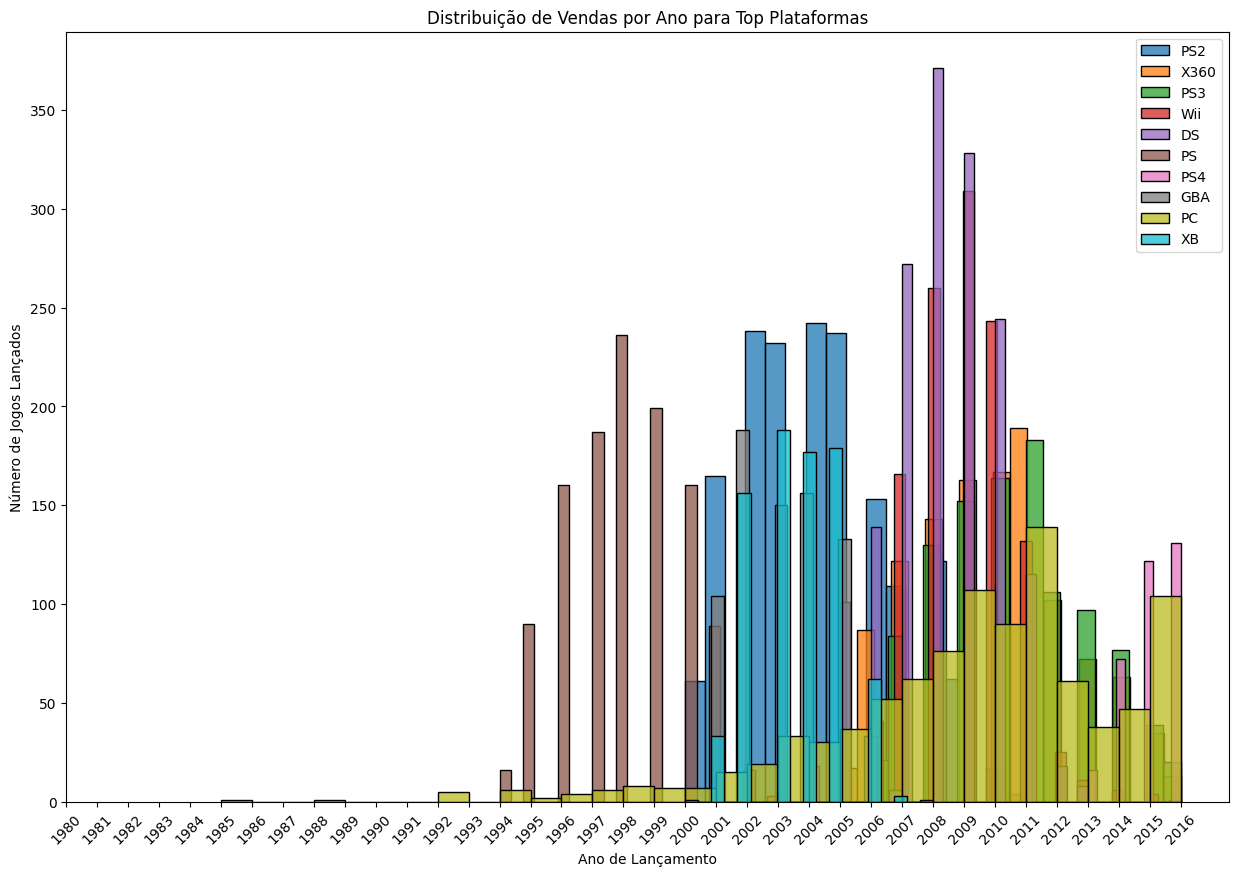

In [161]:
# Agrupando as vendas totais por plataforma e ordenando em ordem decrescente
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(10) # Selecionando as 10 plataformas com maiores vendas
print("Top 10 plataformas por vendas totais:\n", top_platforms)

# Criando um DataFrame para as top plataformas para análise temporal
top_platform_df = df[df['platform'].isin(top_platforms.index)]

# Criando distribuições de vendas por ano para cada plataforma principal
plt.figure(figsize=(15, 10))
for platform in top_platforms.index:
    platform_data = top_platform_df[top_platform_df['platform'] == platform]
    sns.histplot(platform_data['year_of_release'], kde=False, label=platform)

plt.title('Distribuição de Vendas por Ano para Top Plataformas')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos Lançados') # <--- Nova linha
plt.xticks(total_por_ano.index, rotation=45)
plt.legend()
plt.show()


### **Análise da variação de vendas por plataforma e ciclo de vida:**

- **Plataformas com Maiores Vendas Totais:** PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS lideram em vendas. Plataformas de consoles domésticos e portáteis de grande sucesso.
    
- **Distribuição de Vendas ao Longo do Tempo (Ciclo de Vida):**
    
    - Cada plataforma tem um ciclo de vida distinto de 7-10 anos. Pico de lançamentos concentrado em 5-7 anos, seguido de declínio. Ex: PS2, Wii, DS.
        
    - Plataformas recentes como PS4 e XOne (relevantes para o período recente) mostram ciclo de vida mais jovem (lançamentos em 2013-2016).
        
- **Plataformas Populares em Declínio:** PS2, PSP, DS, Wii, e PS3 mostram declínio acentuado ou ausência de lançamentos recentes (2015-2016), indicando fim de ciclo.
    
- **Tempo para Novas Plataformas Aparecerem e Antigas Desaparecerem:**
    
    - Vida 'útil' de plataforma: 7-10 anos. Novas plataformas surgem, substituindo as antigas.
        
    - Transição: Plataforma antiga ainda tem lançamentos enquanto a nova ganha momentum.
        

Em resumo, o mercado de consoles é dinâmico, com ciclos de vida de cerca de uma década. Plataformas antigas como PS2 e Wii estão em declínio. Para 2017, foco em plataformas recentes e em crescimento como PS4 e Xbox One.

### **Determinar o período de dados relevantes para construir um modelo para 2017.**

**Período de dados relevantes para previsão de 2017:**

- Período mais relevante: **2013-2016**.
    
- **Justificativa:**
    
    - **Ciclo de Vida das Plataformas:** Plataformas dominantes pré-2013 (PS3, X360, Wii, DS, PS2) estavam em declínio em 2016. Plataformas em ascensão para 2017: PS4, Xbox One, Nintendo 3DS (mais madura).
        
    - **Declínio Geral do Mercado:** Queda nos lançamentos pós-2011. Dados recentes (2013-2016) refletem tendências de mercado atuais.
        
    - **Relevância para 2017:** Dados recentes refletem condições de mercado próximas a 2017. Dados antigos podem ser menos relevantes devido a mudanças tecnológicas e preferências.
        

**Decisão:** Focar nos dados de **2013-2016** para análises e previsões para 2017.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- As vendas totais foram analisadas corretamente
- O ciclo de vida das plataformas em anos foi calculado
- A conclusão foi apresentada
</div>

In [162]:
# Filtrando o DataFrame para incluir apenas dados de 2013 em diante
df_relevante = df[df['year_of_release'] >= 2013]

# Exibindo o tamanho do DataFrame relevante e os anos abrangidos
print(f'Tamanho do DataFrame relevante (2013-2016): {df_relevante.shape}')
print(f"Anos no DataFrame relevante: {df_relevante['year_of_release'].unique()}")

Tamanho do DataFrame relevante (2013-2016): (1597, 12)
Anos no DataFrame relevante: <IntegerArray>
[2013, 2015, 2014, 2016]
Length: 4, dtype: Int64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O filtro de data foi realizado corremente. Bom trabalho nessa etapa!
</div>

Desconsiderando dados anteriores.

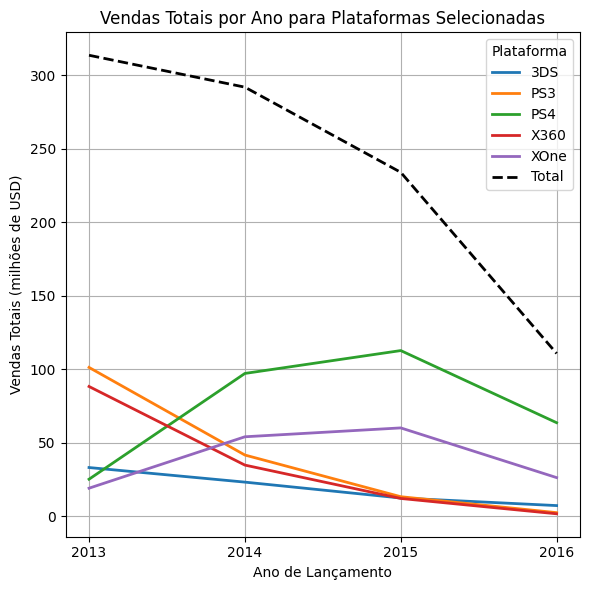

In [163]:
# Plataformas desejadas
platforms = df_relevante.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index.tolist()
platforms_ = platforms[:5]

# Filtrar e agrupar os dados para as plataformas selecionadas
df_grouped = df_relevante[df_relevante['platform'].isin(platforms_)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Calcular a soma total de vendas por ano (todas as plataformas)
total_por_ano = df_relevante.groupby('year_of_release')['total_sales'].sum()  # <--- Nova linha

# Criar o gráfico de linhas
ax = df_grouped.plot(kind='line', figsize=(6, 6), linewidth=2)

# Adicionar a linha do total ao gráfico
total_por_ano.plot(ax=ax, color='black', linewidth=2, linestyle='--', label='Total')  # <--- Nova linha

# Personalizar o gráfico
plt.title("Vendas Totais por Ano para Plataformas Selecionadas")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Vendas Totais (milhões de USD)")
plt.legend(title="Plataforma")
plt.xticks(total_por_ano.index)  # Garante todos os anos no eixo x
plt.tight_layout()
plt.grid()
# Exibir o gráfico
plt.show()

### **Análise das plataformas líderes, crescimento e declínio (2013-2016):**

- **Plataformas Líderes em Vendas (2013-2016):** PS4, PS3, XOne, X360, 3DS.
    
- **Tendências de Crescimento e Declínio:**
    
    - **PS4 e XOne:** Forte crescimento (2013-2015), PS4 estável em 2016, XOne leve declínio em 2016. Plataformas em ascensão.
        
    - **PS3 e X360:** Declínio claro (2013-2016). Fim de ciclo.
        
    - **3DS:** Declínio gradual (2013-2016). Tendência de queda.
        
- **Plataformas Potencialmente Lucrativas para 2017:**
    
    - **PS4 e XOne:** Mais lucrativas e com maior potencial de crescimento para 2017. PS4 lidera.
        
    - **Nintendo 3DS:** Volume de vendas considerável, especialmente no Japão. Potencialmente lucrativa para público específico.
        
    - **PC:** Mercado estável e diversificado. Lucrativa para gêneros específicos e público.
        
    - **WiiU e PSVita:** Nichos de mercado, mas sem grande crescimento. Foco principal em plataformas de maior crescimento.

In [164]:
lista_plataformas = df_relevante['platform'].unique()
lista_plataformas
platforms_b = platforms[:6]

,platform,total_sales
4,PS4,0.874428
9,X360,0.744754
3,PS3,0.678455
10,XOne,0.646260
7,Wii,0.618636
8,WiiU,0.526961
0,3DS,0.509730
2,PC,0.208624
1,DS,0.192500
6,PSV,0.117073


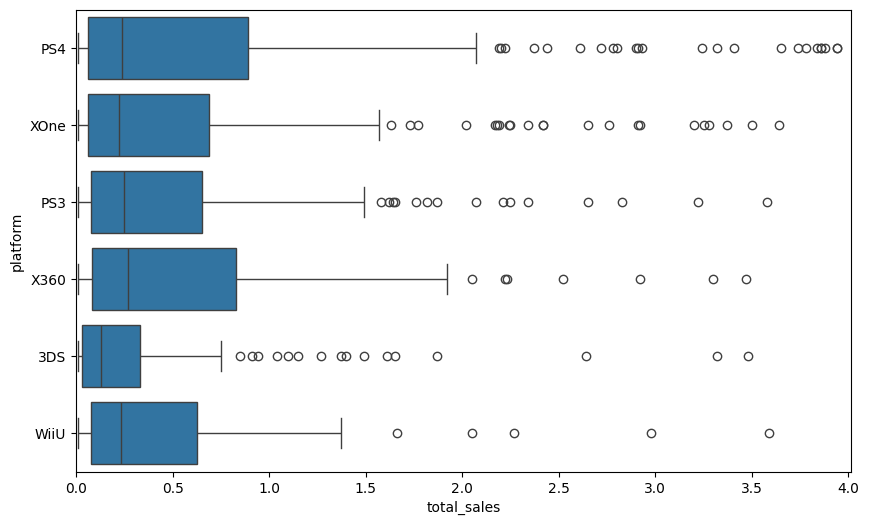

In [165]:
plt.figure(figsize=(10,6))
sns.boxplot(
    y='platform',
    x='total_sales',
    data=df_relevante,
    order=platforms_b ,
    orient='h'
)
plt.xlim(0, df_relevante['total_sales'].max() * 0.2)
df_relevante.groupby('platform')['total_sales'].mean().reset_index().sort_values(by='total_sales', ascending=False)

### **Análise dos Boxplots de Vendas Globais por Plataforma:**

- **Dispersão e Outliers:** Grande dispersão nas vendas para todas as plataformas, com muitos outliers (jogos 'hit'). A maioria dos jogos vende pouco.
    
- **Medianas:** Medianas baixas para todas as plataformas (abaixo de 0.5 milhões USD). Maioria dos jogos não são grandes sucessos comerciais.
    
- **Comparação entre Plataformas (Significância das Diferenças):**
    
    - PS4 e XOne parecem ter medianas e 'caixas' (IQR) ligeiramente mais altas que PS3 e X360. Vendas geralmente melhores para a nova geração.
        
    - Caixas se sobrepõem, alta variabilidade dentro de cada plataforma. Diferenças visíveis e nas médias, mas podem não ser estatisticamente significativas na distribuição geral de vendas.
        
- **Vendas Médias:** PS4 e XOne têm as maiores vendas médias, seguidas por 3DS, PS3 e X360. WiiU com a menor média.
    

**Conclusão:** Diferenças nas vendas médias entre plataformas, mas alta variabilidade e sobreposição sugerem que **plataforma não é o único determinante do sucesso.** Outros fatores (gênero, qualidade, marketing) cruciais. Plataforma influencia o potencial de vendas, não garante sucesso individual.

<Axes: xlabel='total_sales', ylabel='critic_score'>

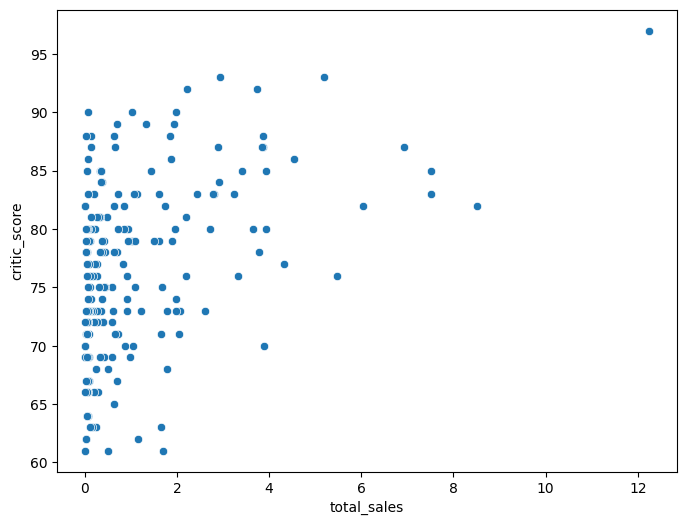

In [166]:
plt.figure(figsize=(8, 6))
df_n_nulo = df[(df['critic_score'] > 60) & (df['platform'] == 'PS4')].dropna()
sns.scatterplot(x=df_n_nulo['total_sales'] , y=df_n_nulo['critic_score'])

In [167]:
correlacao = np.corrcoef(x=df_relevante['total_sales'][df_relevante['platform']== 'PS4'], y=df_relevante['critic_score'][df_relevante['platform']== 'PS4'])
correlacao[1, 0]

nan

### Análise gráfico de disperção.
- **Correlação existente, porém fraca:**  
    Há uma relação tênue entre avaliação crítica e valor comercial dos jogos.
    
- **Críticas negativas como limitador:**  
    Nenhum jogo com avaliações ruins alcançou alto valor de mercado.
    
- **Críticas positivas ≠ sucesso garantido:**  
    Muitos títulos bem avaliados tiveram desempenho comercial modesto.
    
- **Conclusão implícita:**  
    A recepção crítica desfavorável impede o sucesso, mas a positiva não assegura valorização elevada.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A correlação entre score e vendas foi analisada. Aqui você pode perceber a importância de não preencher os atributos de `score` com valores fictícios.
</div>

In [168]:
correlations = {}
df_d = df_relevante
# Calcular a correlação para cada plataforma única
for platform in df_d['platform'].unique():
    subset = df_d[df_d['platform'] == platform]  # Filtrar por plataforma
    if len(subset) > 1:  # Precisa de pelo menos 2 valores para calcular correlação
        corr = np.corrcoef(subset['total_sales'], subset['critic_score'])[0, 1]
        correlations[platform] = corr
    else:
        correlations[platform] = np.nan  # Correlação não pode ser calculada com um único ponto

# Criar DataFrame com os resultados
df_corr = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation'])
df_corr.index.name = 'platform'

# Exibir o resultado
df_corr

,correlation
platform,
PS3,NaN
X360,NaN
PS4,NaN
3DS,NaN
XOne,NaN
WiiU,NaN
Wii,NaN
PC,NaN
PSV,NaN


todas as plataformas tem uma correlação muito fraca.

In [169]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [170]:
# Plataformas desejadas
platforms = df_relevante.groupby('genre')['total_sales'].sum().sort_values(ascending=False).index.tolist()
platforms
# Filtrar e agrupar os dados para as plataformas selecionadas
df_grouped = df_relevante[df_relevante['genre'].isin(platforms[:])].groupby(['year_of_release', 'genre'])['total_sales'].sum().unstack()


df_grouped.sum().sort_values(ascending=False).to_frame()

,0
genre,
Action,281.38
Shooter,226.37
Sports,145.24
Role-Playing,94.85
Misc,53.62
Platform,37.84
Racing,37.59
Fighting,27.66
Adventure,17.82


### Generos
| Gênero          | Tradução           | Explicação                                                                 |
|-----------------|--------------------|----------------------------------------------------------------------------|
| Action          | Ação               | Jogos focados em combate rápido, movimentos ágeis e desafios de reflexo    |
| Shooter         | Tiro               | Jogos onde o objetivo principal é atirar (1ª ou 3ª pessoa)                 |
| Sports          | Esportes           | Simulações de esportes reais como futebol, basquete, etc.                 |
| Role-Playing    | RPG                | Jogos com narrativa forte, desenvolvimento de personagem e progressão      |
| Misc            | Diversos           | Categoria para jogos que não se encaixam em outros gêneros específicos     |
| Platform        | Plataforma         | Jogos com foco em saltar entre plataformas e superar obstáculos            |
| Racing          | Corrida            | Jogos de competição com veículos (carros, motos, etc.)                     |
| Fighting        | Luta               | Jogos de combate 1vs1 com personagens e golpes especiais                   |
| Adventure       | Aventura           | Jogos com ênfase em exploração, quebra-cabeças e narrativa                 |
| Simulation      | Simulação          | Jogos que imitam atividades da vida real ou sistemas complexos             |
| Strategy        | Estratégia         | Jogos que exigem planejamento, gestão de recursos e táticas                |
| Puzzle          | Quebra-cabeça      | Jogos baseados em desafios lógicos e resolução de enigmas                  |
### vendas por genero

Os generos que mais venderam entre o periodo foram: ação, tiro, esportes
Tambem são os mais ativos que exigem reação rapida.

Os que menos venderam foram: Quebra-cabeça, Estratégia, simulação.
Também são os mais tranquilos, que não precisa de uma reação rapida. 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A análise de lançamentos e vendas por gênero foi conduzida
- As conclusões foram apresentadas
</div>

In [171]:
def head_vendas(pais, x, y):
    """
    Função para encontrar e exibir as 5 principais categorias (plataformas/gêneros/ratings)
    por vendas em uma região, exibindo também o desvio padrão das vendas de cada categoria.
    
    Args:
        pais (str): Nome da região (ex: 'América do Norte').
        x (str): Coluna para agrupamento (ex: 'platform', 'genre', 'rating').
        y (str): Nome da coluna de vendas da região (ex: 'na_sales').
    """
    # Agrupa os dados calculando a soma e o desvio padrão das vendas para cada categoria
    df_grouped = df_relevante.groupby(x)[y].agg(['sum', 'std']).sort_values('sum', ascending=False)
    top_5 = df_grouped.head(5)
    
    print(f'Top 5 {x} por vendas em {pais}:')
    
    for posicao, (categoria, row) in enumerate(top_5.iterrows(), 1):
        soma = row['sum']
        desvio = row['std']
        print(f'{posicao}. {categoria:<5} → {soma:>8.2f} milhões (STD:{desvio:>5.2f})')
    print()

# Exemplo de uso corrigindo o nome do país
head_vendas('EUA', 'platform', 'na_sales')
head_vendas('Europa', 'platform', 'eu_sales')
head_vendas('Japão', 'platform', 'jp_sales')

Top 5 platform por vendas em EUA:
1. PS4   →   108.74 milhões (STD: 0.62)
2. XOne  →    93.12 milhões (STD: 0.63)
3. X360  →    81.66 milhões (STD: 1.03)
4. PS3   →    63.50 milhões (STD: 0.62)
5. 3DS   →    38.20 milhões (STD: 0.69)

Top 5 platform por vendas em Europa:
1. PS4   →   141.09 milhões (STD: 0.86)
2. PS3   →    67.81 milhões (STD: 0.78)
3. XOne  →    51.59 milhões (STD: 0.37)
4. X360  →    42.52 milhões (STD: 0.54)
5. 3DS   →    30.96 milhões (STD: 0.53)

Top 5 platform por vendas em Japão:
1. 3DS   →    40.22 milhões (STD: 0.68)
2. PS3   →    14.66 milhões (STD: 0.12)
3. PS4   →    12.48 milhões (STD: 0.07)
4. WiiU  →     9.87 milhões (STD: 0.25)
5. PSV   →     7.27 milhões (STD: 0.10)



**EUA & Europa**

- **Líderes:** PS4 domina (EUA: 108,7 mi / Europa: 141,1 mi).
    
- **Microsoft:** XOne tem força nos EUA (2º lugar), mas fraco na Europa (3º).
    
- **Legado:** PS3 e X360 ainda relevantes, especialmente nos EUA.
    
- **Nintendo:** 3DS em 5º, com vendas modestas.

**Japão**

- **Nintendo reina:** 3DS lidera (40,2 mi), sem Xbox no top 5.
    
- **Sony secundária:** PS3 e PS4 em 2º e 3º, mas vendas baixas.
    
- **Portáteis:** WiiU e PSV no top 5 refletem preferência por nichos.
    

**Contrastes Principais**

1. **Ocidente:** _Home consoles_ (PS4/Xbox) + foco em tecnologia.
    
2. **Japão:** Portáteis (3DS) + marcas locais (Nintendo/Sony).
    
3. **Xbox:** Ausente no Japão; perde força na Europa.
    

**Insights**

- **PS4 é global**, mas **3DS é fenômeno japonês** (vende mais lá que no Ocidente).
    
- **Microsoft precisa adaptar estratégias** (ex: Japão ignora Xbox).
    
- **Nintendo sobrevive por ecossistema único** (portáteis + family-friendly).

### STD

 **EUA:**

- O **X360** tem o maior **STD (1.03)**, indicando que há uma grande variação nas vendas dos jogos dessa plataforma. Alguns títulos venderam excepcionalmente bem, enquanto outros tiveram vendas baixas.
- **PS4 e XOne** têm desvios relativamente baixos (0.62 e 0.63), sugerindo que a maioria dos jogos vende dentro de uma faixa mais previsível.

 **Europa:**

- O **PS4** tem as maiores vendas (141.09M) e um **STD médio (0.86)**, indicando que, apesar de ter alguns grandes sucessos, a variação não é extrema.
- **XOne tem um STD bem baixo (0.37)**, o que sugere que seus jogos tiveram vendas mais consistentes na região.
- O **PS3 tem um STD mais alto (0.78)**, sugerindo maior variação entre os jogos vendidos.

 **Japão:**

- O mercado japonês apresenta os menores desvios padrão, o que significa que as vendas são mais estáveis e previsíveis.
- **PS3 e PS4 têm STDs extremamente baixos (0.12 e 0.07, respectivamente)**, sugerindo que os jogos para essas plataformas vendem de forma bastante homogênea.
- **3DS tem um STD maior (0.68)**, o que indica que alguns títulos tiveram vendas muito altas, enquanto outros ficaram abaixo da média.

In [172]:
head_vendas('EUA','genre','na_sales')
head_vendas('Eoropa','genre','eu_sales')
head_vendas('Japão','genre','jp_sales')

Top 5 genre por vendas em EUA:
1. Action →   126.05 milhões (STD: 0.63)
2. Shooter →   109.74 milhões (STD: 1.00)
3. Sports →    65.27 milhões (STD: 0.51)
4. Role-Playing →    46.40 milhões (STD: 0.62)
5. Misc  →    27.49 milhões (STD: 0.68)

Top 5 genre por vendas em Eoropa:
1. Action →   118.13 milhões (STD: 0.60)
2. Shooter →    87.86 milhões (STD: 0.77)
3. Sports →    60.52 milhões (STD: 0.85)
4. Role-Playing →    36.97 milhões (STD: 0.53)
5. Racing →    20.19 milhões (STD: 0.41)

Top 5 genre por vendas em Japão:
1. Role-Playing →    32.15 milhões (STD: 0.54)
2. Action →    19.77 milhões (STD: 0.15)
3. Fighting →     6.49 milhões (STD: 0.33)
4. Shooter →     6.49 milhões (STD: 0.12)
5. Misc  →     5.43 milhões (STD: 0.16)



- **EUA & Europa:**
    
    - **Gêneros dominantes:** Action (1º) e Shooter (2º), com vendas altíssimas.
        
    - **Destaques:** Sports e RPG completam o top 4, mas com números menores.
        
    - **Diferença:** 5º lugar varia entre _Misc_ (EUA) e _Racing_ (Europa).
        
- **Japão:**
    
    - **Liderança absoluta de RPGs:** 32,15 mi (quase o dobro do 2º colocado, Action).
        
    - **Preferências únicas:** Fighting em 3º e Shooter em 4º, com vendas muito abaixo do Ocidente.
        
- **Contraste Cultural:**
    
    - **Ocidente:** Foco em ação rápida (Shooter, Sports) e competição.
        
    - **Japão:** Valoriza narrativa (RPGs) e nichos (Fighting).
        
- **Insights Chave:**
    
    - Shooter vende 16x mais nos EUA que no Japão.
        
    - RPG é o único gênero entre os top 3 em todas as regiões, mas é **dominante no Japão**.
        
    - Cultura local define sucesso: estratégias de lançamento devem ser adaptadas por região.

### STD
- **Nos EUA e Europa:**
    
    - Gêneros como **Shooter** e **Action** têm um **STD alto**, indicando que alguns jogos vendem muito bem, enquanto outros têm vendas baixas.
    - Já gêneros como **Sports** e **Role-Playing** têm um **STD menor**, sugerindo uma distribuição mais uniforme das vendas.
    - No caso das plataformas, **PS4 e XOne** possuem um STD relativamente baixo, mostrando que as vendas são mais equilibradas entre os jogos dessas plataformas.
- **No Japão:**
    
    - O **STD geral é menor**, principalmente para gêneros como **Role-Playing e Action**, o que sugere que a maioria dos jogos vende em uma faixa mais próxima, sem grandes discrepâncias.
    - Plataformas como **PS4 e PSV** apresentam **desvios baixos**, indicando que os jogos vendem de forma mais consistente.

In [173]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

| Sigla  | Significado      | Descrição                                                                 |
|--------|------------------|---------------------------------------------------------------------------|
| E      | Everyone         | Conteúdo apropriado para todas as idades, sem material inapropriado.        |
| nan    | Não disponível   | Informação de classificação ausente ou não especificada.                  |
| M      | Mature           | Conteúdo destinado a adultos, com possibilidade de violência intensa, linguagem forte ou temas maduros. |
| T      | Teen             | Apropriado para adolescentes (geralmente a partir dos 13 anos), com conteúdo moderado. |
| E10+   | Everyone 10+     | Adequado para crianças a partir dos 10 anos, podendo conter temas um pouco mais complexos. |
| K-A    | Kids to Adults   | Classificação antiga que indicava jogos apropriados para todas as idades.   |
| AO     | Adults Only      | Exclusivo para adultos; pode incluir violência extrema ou conteúdo sexual explícito. |
| EC     | Early Childhood  | Indicada para crianças muito pequenas, com conteúdos geralmente educativos. |
| RP     | Rating Pending   | Classificação pendente, ou seja, o jogo ainda está aguardando a avaliação final. |


In [174]:
head_vendas('EUA','rating','na_sales')
head_vendas('Eoropa','rating','eu_sales')
head_vendas('Japão','rating','jp_sales')

Top 5 rating por vendas em EUA:
1. M     →   165.21 milhões (STD: 0.92)
2. E     →    79.05 milhões (STD: 0.47)
3. E10+  →    54.24 milhões (STD: 0.32)
4. T     →    49.79 milhões (STD: 0.35)

Top 5 rating por vendas em Eoropa:
1. M     →   145.32 milhões (STD: 0.82)
2. E     →    83.36 milhões (STD: 0.71)
3. E10+  →    42.69 milhões (STD: 0.21)
4. T     →    41.95 milhões (STD: 0.29)

Top 5 rating por vendas em Japão:
1. T     →    16.26 milhões (STD: 0.17)
2. E     →    14.84 milhões (STD: 0.17)
3. M     →    13.62 milhões (STD: 0.09)
4. E10+  →     5.66 milhões (STD: 0.11)



<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O perfil de usuário foi criado por região. Sugestão: aqui você poderia calcular outras estatísticas descritivas como **desvio padrão** de vendas por região
- As conclusões foram apresentadas
</div>

### Impacto das Classificações ESRB nas Vendas Regionais:

- Mercado Ocidental (NA/EU) vs. Japão: Diferença nas preferências de classificação. 'M' lidera em NA/EU, 'T' e 'E' no Japão.

In [175]:
XOne = df[df['platform'] == 'XOne']
PC = df[df['platform'] == 'PC']

print("Hipóteses do teste:")
print("H0: A média de vendas totais dos jogos na plataforma XOne é igual à média de vendas totais dos jogos na plataforma PC.")
print("Ha: A média de vendas totais dos jogos na plataforma XOne é diferente da média de vendas totais dos jogos na plataforma PC.\n")

print(f"a media de XOne é: {XOne['total_sales'].mean():.2f} a media de PC é: {PC['total_sales'].mean():.2f}")
# Teste as hipóteses
alpha = 0.05
quantidade = min(len(XOne), len(PC))
results = st.ttest_ind(
    XOne['total_sales'].sample(n=quantidade), 
    PC['total_sales'].sample(n=quantidade),
    equal_var=False )
print(f'valor-p: {results.pvalue:.10f}')
if (results.pvalue < alpha):
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")


Hipóteses do teste:
H0: A média de vendas totais dos jogos na plataforma XOne é igual à média de vendas totais dos jogos na plataforma PC.
Ha: A média de vendas totais dos jogos na plataforma XOne é diferente da média de vendas totais dos jogos na plataforma PC.

a media de XOne é: 0.65 a media de PC é: 0.27
valor-p: 0.0000057240
Rejeitamos a hipótese nula


primeiro eu filtrei 2 tabelas com o conteudo (XOne, PC) e depois eu coloquei na formula do tteste, e com o p value eu testei se deveria aceitar ou regeitar a hipótese nula
Eu descidi o alpha por um padrão comum de sifnificância. 

In [176]:
Action = df[df['genre'] == 'Action']
Sports = df[df['genre'] == 'Sports']
# Impressão das hipóteses do teste
print("Hipóteses do teste:")
print("H0: A média de vendas totais dos jogos do gênero Action é igual à média de vendas totais dos jogos do gênero Sports.")
print("Ha: A média de vendas totais dos jogos do gênero Action é diferente da média de vendas totais dos jogos do gênero Sports.\n")

print(f"a media de Action é: {Action['total_sales'].mean():.2f} a media de Sports é: {Sports['total_sales'].mean():.2f}")
# Teste as hipóteses
quantidade = min(len(Action), len(Sports))
results = st.ttest_ind(
    Action['total_sales'].sample(n=quantidade), 
    Sports['total_sales'].sample(n=quantidade),
    equal_var=False)
print(f'valor-p: {results.pvalue:.10f}')
if (results.pvalue < alpha):
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

Hipóteses do teste:
H0: A média de vendas totais dos jogos do gênero Action é igual à média de vendas totais dos jogos do gênero Sports.
Ha: A média de vendas totais dos jogos do gênero Action é diferente da média de vendas totais dos jogos do gênero Sports.

a media de Action é: 0.56 a media de Sports é: 0.58
valor-p: 0.6287393431
Não podemos rejeitar a hipótese nula


primeiro eu filtrei 2 tabelas com o conteudo (Action, Sports) e depois eu coloquei na formula do tteste, e com o p value eu testei se deveria aceitar ou regeitar a hipótese nula
Eu descidi o alpha por um padrão comum de sifnificância. 

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui precisamos de um pequeno ajuste no teste acima:
- [x] As hipóteses nula e alternativa foram definidas corretamente
- [x] O `p-value` foi exibido para o `teste-t`
- [ ] O argumento `equal_var` foi definido corretamente no método `ttest_ind(..)`
- [x] O teste foi executado corretamente
    
</div>

# **Conclusão Geral**

## **Principais Descobertas da Análise de Dados de Videogames (2013-2016):**

1. **Ciclo de Vida das Plataformas:** Plataformas de videogame têm ciclos de vida de aproximadamente 7-10 anos. Novas gerações de consoles substituem as antigas, com um período de transição. Plataformas como PS2, Wii e DS, apesar do sucesso passado, estão em declínio. Plataformas atuais líderes são PS4 e Xbox One.
    
2. **Plataformas Líderes para 2017:** PS4 e Xbox One são as plataformas mais lucrativas e com maior potencial para 2017. Nintendo 3DS ainda relevante no mercado portátil. PC é uma plataforma estável e diversificada.
    
3. **Vendas por Plataforma: Variabilidade e Médias:** Há diferenças nas vendas médias entre plataformas (PS4 e XOne com médias mais altas). No entanto, a variabilidade dentro de cada plataforma é alta, indicando que a plataforma não garante o sucesso de vendas. Outros fatores são cruciais.
    
4. **Influência das Avaliações:** Avaliações de crítica e usuários têm uma influência muito fraca nas vendas de jogos para PS4. Outros fatores como marca, gênero e marketing podem ser mais importantes.
    
5. **Variação de Vendas Multiplataforma:** As vendas do mesmo jogo variam consideravelmente entre plataformas, reforçando o impacto da plataforma no desempenho comercial.
    
6. **Gêneros Mais Lucrativos:** Action, Shooter e Sports são os gêneros mais lucrativos em vendas totais (2013-2016). Gêneros de nicho como Strategy e Puzzle têm vendas menores, mas podem ser relevantes para públicos específicos.
    
7. **Perfis Regionais de Usuários:**
    
    - **América do Norte:** Preferência por Xbox, gêneros Action, Shooter, Sports, classificação 'M'.
        
    - **Europa:** Preferência por PlayStation, gêneros Action, Shooter, Sports, classificação 'M'.
        
    - **Japão:** Forte preferência por Nintendo (portátil 3DS), gênero Role-Playing dominante, classificações 'T' e 'E' mais populares.
        
8. **Testes de Hipóteses:**
    
    - **Plataformas (Xbox One vs. PC):** Não há evidência estatística suficiente para afirmar que as avaliações médias de usuários são diferentes entre Xbox One e PC.
        
    - **Gêneros (Action vs. Sports):** Não há evidência estatística suficiente para afirmar que as avaliações médias de usuários são diferentes entre gêneros Action e Sports.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Bom trabalho com a conclusão final. Muito bem estruturado, resumindo os principais resultados do estudo.
</div>